In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns


In [4]:
df = pd.read_csv ('HR_turnover.csv')

**Describe the Data**

The data is related to turnover rates in a company. Below are the variables. The dependent is categorical and coded as 0 = not left and 1= left the company. There are two string variables that needs to be converted: Occupatin and Salary.


**Variables**:

    Satisfaction_level: Level of employee satisfaction
    Last_evaluation: Rating from last rating
    Number_project: Number of projects worked
    Average_montly_hours: Monthly average hours worked
    Time_spend_company: Years of work in the company
    Work_accident: 0 - Did not have an accident at work and 1 - Had an accident at work
    Left: Dismissal indicator, 0 - Contracted and 1 - Off
    Promotion_last_5years: Promotion indicative, 0 - No and 1 - Yes
    Occupation: Department
    Salary: Low, Medium and High

**Objectives**

**Research Problem**
1. What are the factors that contributed to employees leaving the company?
2. Are the best employees leaving the company? 

**Sub-questions**

- Did the employees who left had low-satisfaction?
- Did the employees who left had lots or projects at their disposal?
- Did the employees who left overworked?
- Did the employees who left had low salaries?
- Which occupation had the highest turnover rate?

**Data Exploration**

  - Understand the data 
  - Clean the data
  - Analyze relationship between variables



**UNDERSTAND THE DATA**

In [110]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Occupation', 'salary'],
      dtype='object')

In [111]:
df.shape

(14999, 10)

In [113]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Occupation,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [114]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Occupation,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


**Check for null values**

In [115]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Occupation               0
salary                   0
dtype: int64

**Check for Unique Values**


In [116]:
df.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Occupation                10
salary                     3
dtype: int64

**There are two string values** 

- Occupation 
- Salary

Let's check for unique vaalues

In [117]:
###Checking for specific unique values
df['Occupation'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [118]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

**Rename Columns**

Lets rename the *Occupation* column to department

In [119]:
df=df.rename(columns={'Occupation':'department'})

In [120]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [121]:
###Let's verify to see if anything changes
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

**Check Columns and Row content**

In [122]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

**Check for Null Values**

In [123]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

**Check for Duplicates**

In [124]:
df = df.drop_duplicates()
df.count()

satisfaction_level       11991
last_evaluation          11991
number_project           11991
average_montly_hours     11991
time_spend_company       11991
Work_accident            11991
left                     11991
promotion_last_5years    11991
department               11991
salary                   11991
dtype: int64

**Summary Statistics**

Summary statistics are there to give you an overall view of the metrics in your data set at a glance. They include the count of observations, the mean of observations, the standard deviation, min, 25% quartile, 50% quartile, 75% quartile, and the max value in each Series. What isn’t usually included in the outputs of summary statistics are categorical variables or string variables.

To get summary statistics in Pandas, you simply need to use DataFrame.describe() to get an output similar to the below:


In [125]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


**Categorical Variables**

Not too much to consider with the categorical variables.
Lets investigative them further.
From the below table, there are 10 departmetns and three levles of salary.



In [126]:
df.describe(include=['O'])

,department,salary
count,11991,11991
unique,10,3
top,sales,low
freq,3239,5740


**Descriptive Stats Analysis**

We can draw the following insights from the **Descriptive Statistics**

- There are ten departments and three salary levels.
- employees have relatively short tenure with the firm (between 3 to 5 years); maximium 10 years.
- Average satisfaction level is about 62%.
- Generally above average performers (72%). Abour 66% are condense in the IQR range.
-On average, employees work on 3.8 projects a year; about 50% of them work on 4 projects per year.The most project work per year is 7.
- Average montly hours work is 200, which translate to 50 hrs a week. 
- On average, employees spend about 3.36 years working at the company. The maximium time spent working with the company is 10 years. 
- Work accident is rare. 
- Less than 2% of employees get promoted in the last 5 years. 
 


**UNIVARIATE ANALYSIS**

Let's visualize the findings from the descriptice stats

**Histogram & Jointplot Generation**

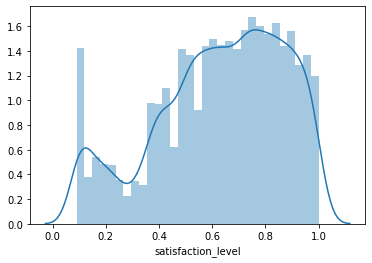

In [127]:
sns.distplot(df['satisfaction_level' ])

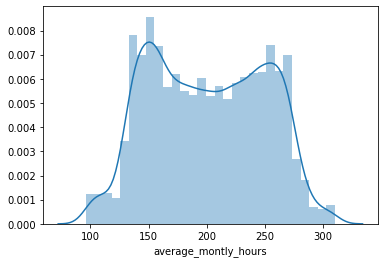

In [128]:
sns.distplot(df['average_montly_hours'])

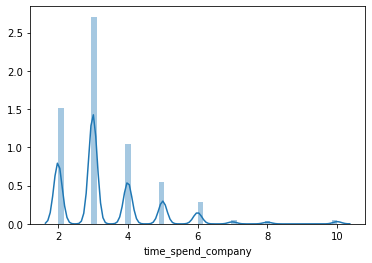

In [129]:
sns.distplot(df['time_spend_company' ])

**Histogram with Pandas**

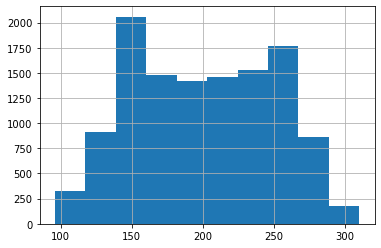

In [130]:
df['average_montly_hours'].hist()

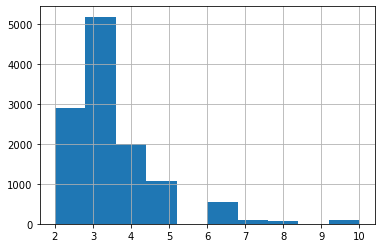

In [131]:
df['time_spend_company'].hist()

**More Data Exploration**

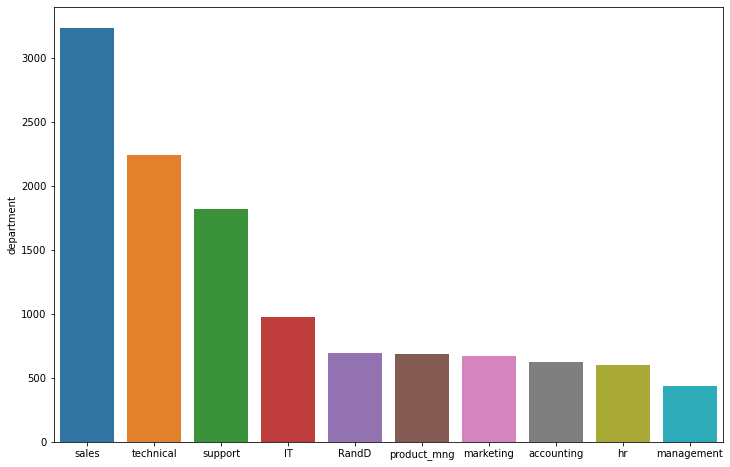

In [132]:
cat_counts = df['department'].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(cat_counts.index, cat_counts)

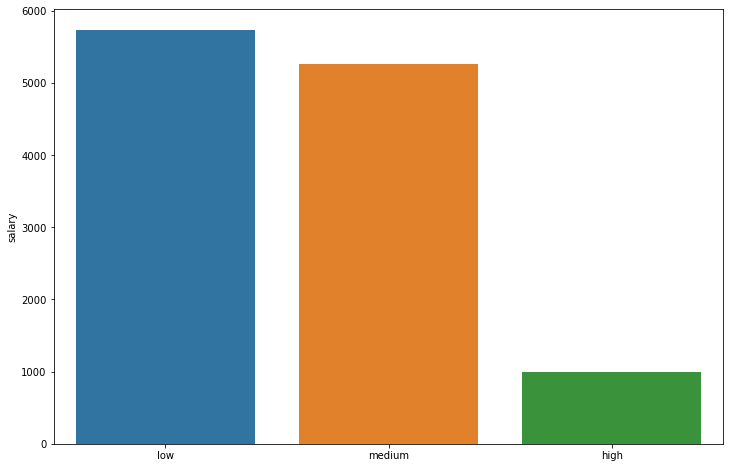

In [134]:
cat_counts = df['salary'].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(cat_counts.index, cat_counts)

In [5]:
def distplay(feature):
    sns.distplot(df[feature])
def catplay(feature):
    cat_counts = df[feature].value_counts()
    sns.barplot(cat_counts.index, cat_counts)
    print("Mean of %s: %.3f" % (feature, df[feature].mean()))
    print("Mode of %s: %.3f" % (feature, df[feature].mode()))

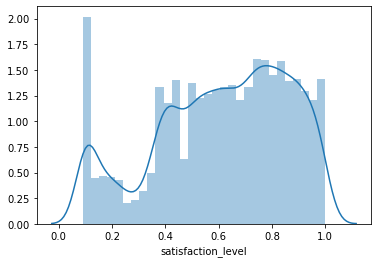

In [6]:
distplay('satisfaction_level')

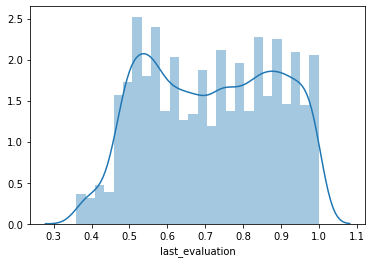

In [137]:
distplay('last_evaluation')

**Visualization of Stay and Left the Company**

Mean of left: 0.166
Mode of left: 0.000


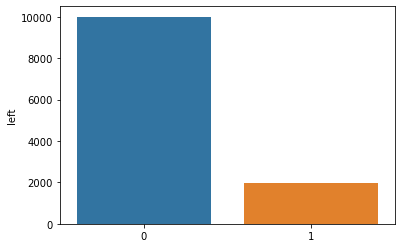

In [138]:
##Left = 1. Stay = 0
catplay('left')

In [139]:
count_no_sub = len(df[df['left']==0])
count_sub = len(df[df['left']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage not left is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage left", pct_of_sub*100)


percentage not left is 83.39588024351598
percentage left 16.604119756484028


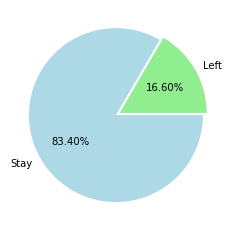

In [140]:
left = len(df[df["left"]==1])
stay = len(df[df["left"]==0])
values = [left,stay]
labels = ["Left","Stay"]
colors = ['lightgreen','lightblue']
explode = [0.05,0]
fig = plt.figure(figsize = (4,4))
pie = plt.pie(values, labels = labels, colors = colors, explode = explode, autopct = '%4.2f%%')

**BIIVARIATE RELATIONSHIP**

**Categorical Variables**

**Boxplots**

One important part beyond simply pulling summary statistical methods is to get a visual sense of the distributions of various variables within a given Series or Series by category using boxplots.

In the below example we generate a boxplot in the Pandas library. 

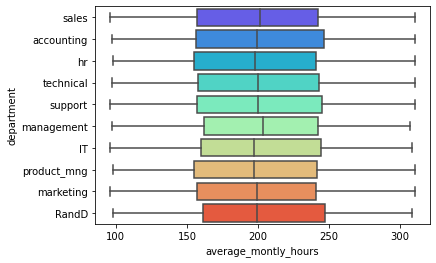

In [141]:
sns.boxplot(x='average_montly_hours', y='department', data=df,palette='rainbow')


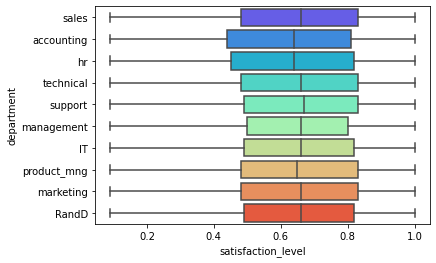

In [142]:
sns.boxplot(x='satisfaction_level', y='department', data=df,palette='rainbow')

Text(0.5, 1.0, 'Satisfaction by Salary')

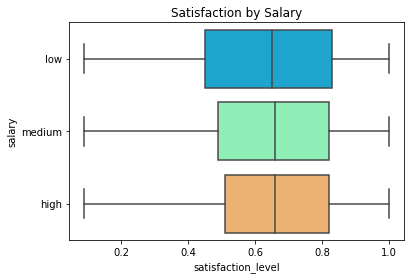

In [143]:
sns.boxplot(x='satisfaction_level', y='salary', data=df,palette='rainbow').set_title("Satisfaction by Salary")

**Boxplot of All Variables**

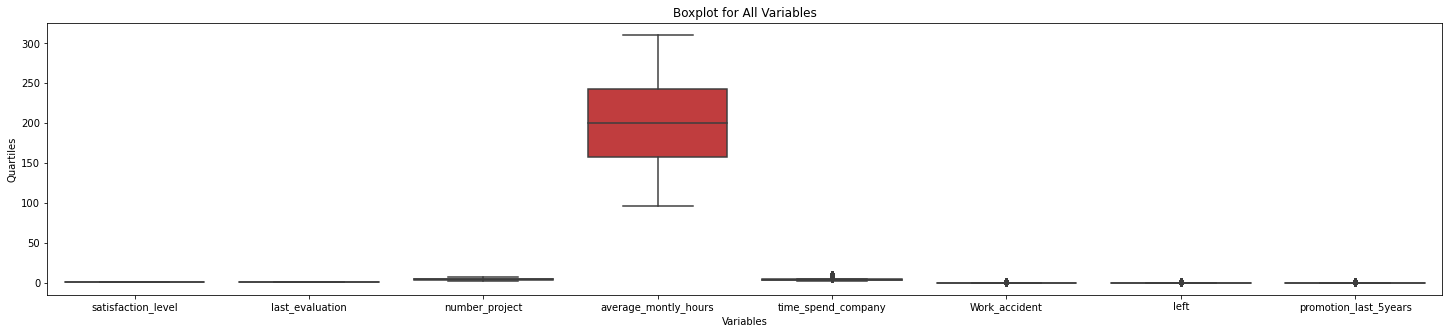

In [144]:
plt.figure(figsize=(25,5))
boxplot = sns.boxplot(data=df)
boxplot = plt.xlabel('Variables')
boxplot  = plt.ylabel('Quartiles')
plt.title('Boxplot for All Variables')
plt.show()

In [47]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

**Violin Plots**

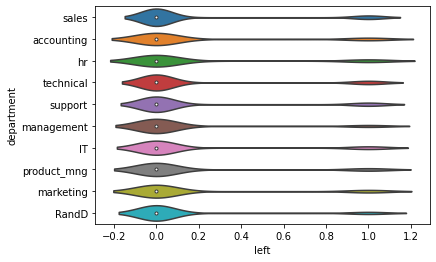

In [145]:
sns.violinplot (x= 'left', y='department', data=df,size=10)

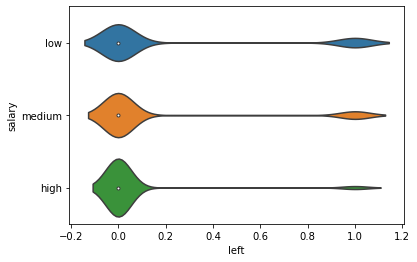

In [146]:
sns.violinplot (x= 'left', y='salary', data=df,size=8)

Both *Occupation* and  *Salary* seems to be inversely correlated with whether someone will leave.

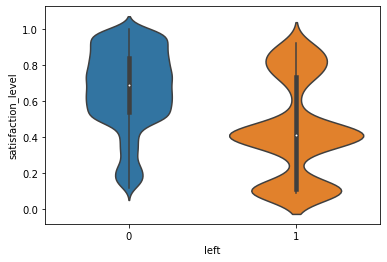

In [147]:
sns.violinplot (x= 'left', y='satisfaction_level', data=df,size=8)

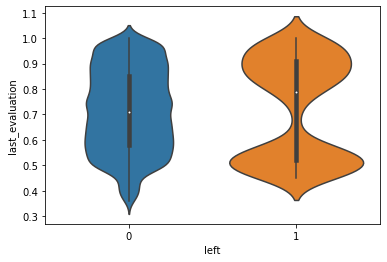

In [148]:
sns.violinplot (x= 'left', y='last_evaluation', data=df,size=8)

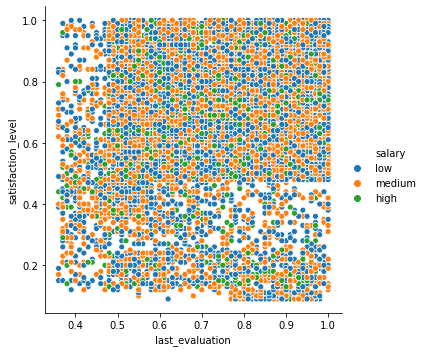

In [149]:
sns.relplot(x="last_evaluation", y="satisfaction_level",  hue='salary', data=df);

**Jointplots**

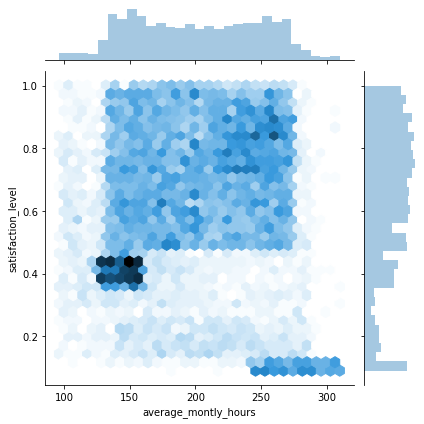

In [150]:
sns.jointplot(x='average_montly_hours',y='satisfaction_level',data=df,kind='hex')

There is no discernable patterns from these scatterplots.

Lets do a pairplot with all the variables to discern any relationships.

**Preparing the data for further analysis**

Occupation and Salary are string variables. They need to be converted to numerical variables

**Pivoting Pairs**

Let's do some feature selection to analyze good predictors for employees leaving. 

This can b done by using "pivoting" pairs of features as shown below.

**Feature Selection of Categorical Variables**

- About 5% of individuals who were in work accident left the company, while 18.5% who did not had work accident stayed. 
- HR, Accounting, and support had the highest leave rate (17% respectively).
- Employees with low salries had the highest turover (20%).  About 5% of employees with high salaries left the company.
- Employees tend to leave the company when they are few project or too many projects.
- About 45% of employees spent 5 years with the company. 
- Most dept has a 200 hours work week.


In [151]:
df[['Work_accident', 'left']].groupby(['Work_accident'], as_index=False).mean().sort_values(by='left')

,Work_accident,left
1,1,0.056757
0,0,0.185978


In [152]:
df[['department', 'left']].groupby(['department'], as_index=False).mean().sort_values(by='left', ascending=False)

,department,left
3,hr,0.188020
2,accounting,0.175523
9,technical,0.173797
8,support,0.171334
7,sales,0.169805
5,marketing,0.166419
0,IT,0.161885
6,product_mng,0.160350
1,RandD,0.122478
4,management,0.119266


In [153]:
df[['salary', 'left']].groupby(['salary'], as_index=False).mean().sort_values(by='left', ascending=False)

,salary,left
1,low,0.204530
2,medium,0.146170
0,high,0.048485


In [55]:
df[['number_project', 'left']].groupby(['number_project'], as_index=False).mean().sort_values(by='number_project')

,number_project,left
0,2,0.541719
1,3,0.010795
2,4,0.064315
3,5,0.153605
4,6,0.449153
5,7,1.000000


In [154]:
df[['time_spend_company', 'left']].groupby(['time_spend_company'], as_index=False).mean().sort_values(by='time_spend_company')

,time_spend_company,left
0,2,0.010653
1,3,0.168401
2,4,0.246883
3,5,0.453861
4,6,0.201107
5,7,0.000000
6,8,0.000000
7,10,0.000000


Let's look at department and the amount of work each departmetn does per week. Is HR and Accounting any different? Are some departmetns working their employees harder?

A look at the results below show that HR has the lowest amount of hours work. Accounting is in the middle with 201 hrs per week.

In [155]:
df[['department', 'average_montly_hours']].groupby(['department'], as_index=False).mean().sort_values(by='average_montly_hours', ascending=False)

,department,average_montly_hours
4,management,201.529817
1,RandD,201.291066
9,technical,201.115419
2,accounting,200.877617
0,IT,200.638320
8,support,200.627128
7,sales,200.242050
5,marketing,199.487370
3,hr,199.371048
6,product_mng,198.893586


In [156]:
df[['left', 'average_montly_hours']].groupby(['left'], as_index=False).mean().sort_values(by='average_montly_hours', ascending=False)

,left,average_montly_hours
1,1,208.16223
0,0,198.94270


**BIVARIATE RELATINSHIPS**

**Plots Numeric Variables**

In [157]:
# Identify numeric variables
df.select_dtypes(['float64','int64']).columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years'],
      dtype='object')

**Scatter Plot Numerical Features**

Pivot Pairs is only useful for categorical type variables. I will use scatter plots to assess the leave rate with the continious variables or numeric variables.

To calculate the "leave_rate": numerical features divided by the number of employees that left by the total.

**Observations**

- Mix bag. There are instances where lower levels of satisfaction leadss to higher turnover rates; there are also instances where low satisfaction seems related to low turnover rates.
- Two clusters: people who leave have low evaluations (>6); others who leave hae high evaluations ( >8). 
- Employees tend to leave when they are over worked (> 200 hours) or overworked (>250 hours).
   
  

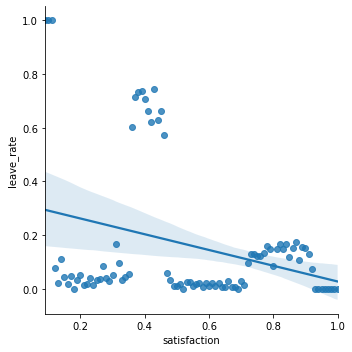

In [158]:
leave_sat=df.groupby('satisfaction_level').agg({'left': lambda x: len(x[x==1])})
leave_sat['total']=df.groupby('satisfaction_level').agg({'left': len})
leave_sat['leave_rate']=leave_sat['left']/leave_sat['total']
leave_sat['satisfaction']=df.groupby('satisfaction_level').agg({'satisfaction_level': 'mean'})
g=sns.lmplot('satisfaction', 'leave_rate',data=leave_sat)

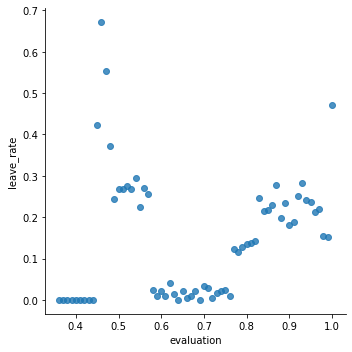

In [159]:
leave_eval=df.groupby('last_evaluation').agg({'left': lambda x: len(x[x==1])})
leave_eval['total']=df.groupby('last_evaluation').agg({'left': len})
leave_eval['leave_rate']=leave_eval['left']/leave_eval['total']
leave_eval['evaluation']=df.groupby('last_evaluation').agg({'last_evaluation': 'mean'})
gr=sns.lmplot('evaluation', 'leave_rate',data=leave_eval,fit_reg=False)

In [160]:
df. columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

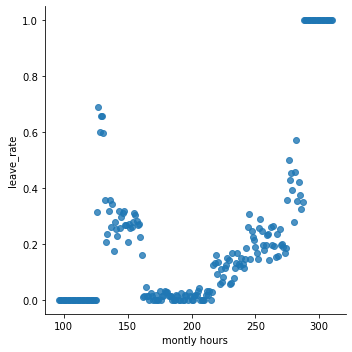

In [161]:
leave_hours=df.groupby('average_montly_hours').agg({'left': lambda x: len(x[x==1])})
leave_hours['total']=df.groupby('average_montly_hours').agg({'left': len})
leave_hours['leave_rate']=leave_hours['left']/leave_hours['total']
leave_hours['montly hours']=df.groupby('average_montly_hours').agg({'average_montly_hours': 'mean'})
grid=sns.lmplot('montly hours', 'leave_rate',data=leave_hours,fit_reg=False)



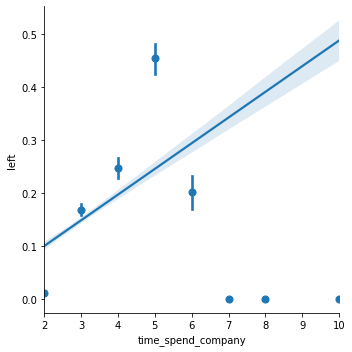

In [162]:
sns.lmplot(x="time_spend_company", y="left", data=df, x_estimator=np.mean);

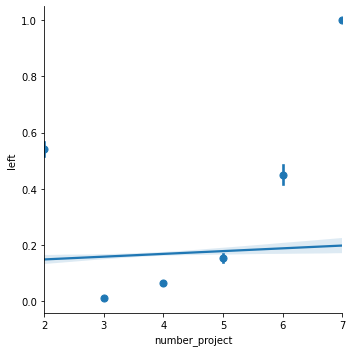

In [163]:
sns.lmplot(x="number_project", y="left", data=df, x_estimator=np.mean);

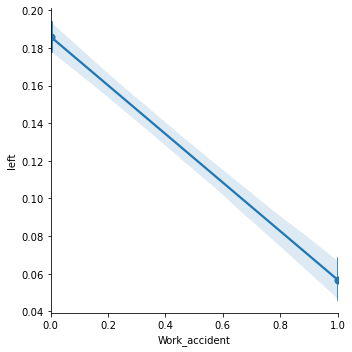

In [164]:
sns.lmplot(x="Work_accident", y="left", data=df, x_estimator=np.mean);

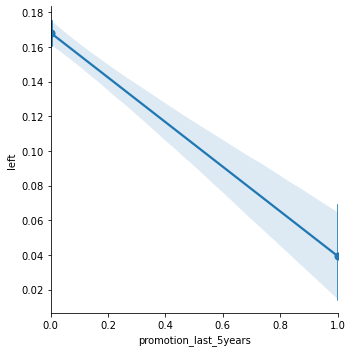

In [165]:
sns.lmplot(x="promotion_last_5years", y="left", data=df, x_estimator=np.mean);

**Correlation Matrix**

Check for multicollinearity without the string variables *department* and *salary*

In [166]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
Work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


*numeber of project* and *average monthly hours* seems moderately high. 
same with *average montly hours* and * number of projects*

Let's verify the  correlation coefficient to make sure they are not highly correlated with eachother 

However, a .3315 correlation coefficient is not strong enough to warrant removal.

In [167]:
print (np.corrcoef(df['number_project'], df['average_montly_hours']))

[[1.         0.33151637]
 [0.33151637 1.        ]]


In [168]:
print (np.corrcoef(df['average_montly_hours'], df['number_project']))

[[1.         0.33151637]
 [0.33151637 1.        ]]


**DATA PREPOSSING**

Clean and Prepare data for model

**Convert *Occupation* and *Salary* to categorical variable**

Salary is currently a string variable coded as low, medium, and high. Lets recode so that salary is now a categorical variable.

Department is currently has the following job type: sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'. A lot of these roles overlap and some department can be merged into one.
       
Let's group "technical", "IT", "Support" and call it "support_staff"

Let's group "management", product_mng", and "RandD" as "strategic_management"

       


For Future reference, convert categorical to numerical
#convert salary to numeric value
salary_dic = {'low': 1, 'medium':2, 'high':3}
data['salary'] = data['salary'].map(salary_dic)
data.head()

In [169]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [170]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [171]:
df['department']=np.where(df['department'] =='technical', 'support_staff', df['department'])
df['department']=np.where(df['department'] =='IT', 'support_staff', df['department'])
df['department']=np.where(df['department'] =='support', 'support_staff', df['department'])

In [172]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'support_staff', 'management',
       'product_mng', 'marketing', 'RandD'], dtype=object)

In [173]:
df['department']=np.where(df['department'] =='management', 'strategic_management', df['department'])
df['department']=np.where(df['department'] =='product_mng', 'strategic_management', df['department'])
df['department']=np.where(df['department'] =='RandD', 'strategic_management', df['department'])


In [174]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'support_staff',
       'strategic_management', 'marketing'], dtype=object)

In [175]:
pd.get_dummies(df, columns=['salary','department'])


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium,department_accounting,department_hr,department_marketing,department_sales,department_strategic_management,department_support_staff
0,0.38,0.53,2,157,3,0,1,0,0,1,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,1,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,1,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,1,0,0,0,0,0,0,1,0
11996,0.74,0.95,5,266,10,0,0,1,1,0,0,0,0,0,0,1,0
11997,0.85,0.54,3,185,10,0,0,1,1,0,0,0,0,0,0,1,0
11998,0.33,0.65,3,172,10,0,0,1,1,0,0,0,0,1,0,0,0


In [176]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [177]:
df = pd.get_dummies(df, columns=['salary','department']) 


**Correlation Matrix**

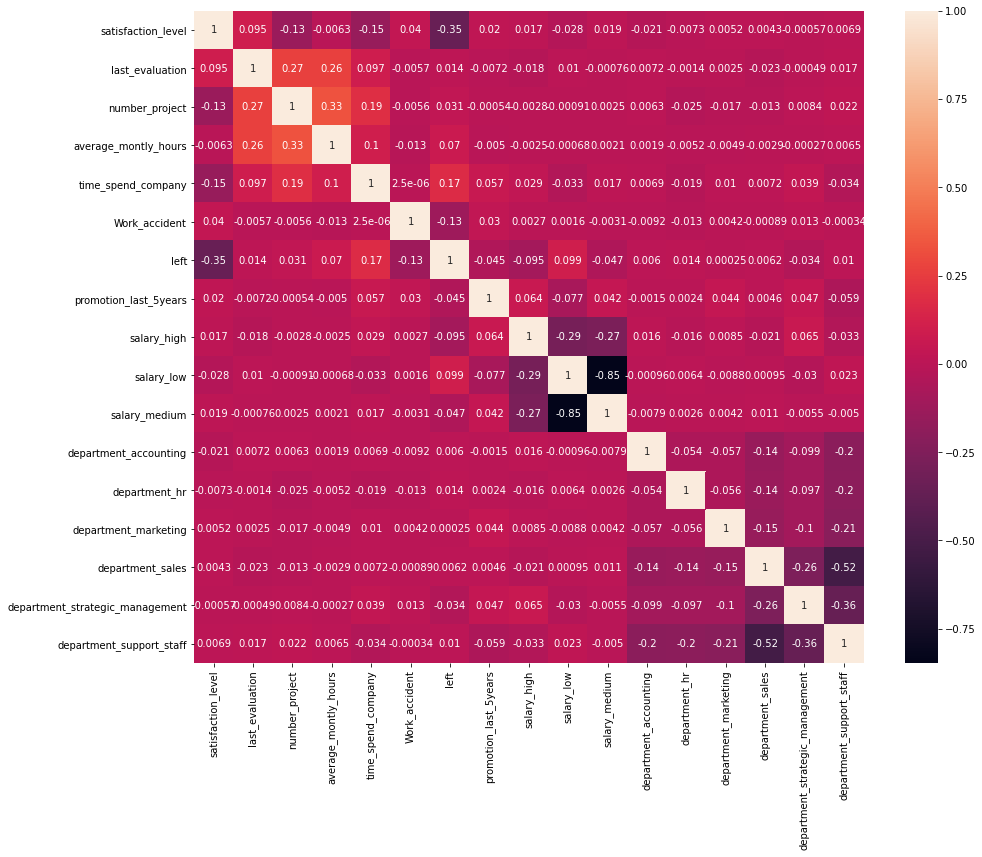

In [178]:
f, ax = plt.subplots(figsize=(15, 12))
cor = df.corr()
sns.heatmap(cor, annot=True)

In [179]:
cor = pd.DataFrame(cor['left'].sort_values().drop('left'))
cor

,left
satisfaction_level,-0.350558
Work_accident,-0.125436
salary_high,-0.094769
salary_medium,-0.047214
promotion_last_5years,-0.044657
department_strategic_management,-0.034091
department_marketing,0.000248
department_accounting,0.005955
department_sales,0.006154
department_support_staff,0.010436


**Model Building**

I would like to get the p-values. Hence I will first use Statsmodel

In [180]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary_high', 'salary_low', 'salary_medium',
       'department_accounting', 'department_hr', 'department_marketing',
       'department_sales', 'department_strategic_management',
       'department_support_staff'],
      dtype='object')

In [181]:
import statsmodels.api as sm

In [182]:
estimators = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 
       'promotion_last_5years', 'salary_low', 'salary_medium',
       'department_accounting', 'department_hr', 'department_marketing',
       'department_sales', 'department_strategic_management',
       'department_support_staff']
estimators

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'salary_low',
 'salary_medium',
 'department_accounting',
 'department_hr',
 'department_marketing',
 'department_sales',
 'department_strategic_management',
 'department_support_staff']

**Featured Engineering**

**Variable Omission**


we know that only 4% of employees with high salaries leave their jobs.So let's leave the categorical variable high salaries out because this may overfit the model. 



In [183]:
X1 = df[estimators]
y = df['left']

In [185]:
X = sm.add_constant(X1)
reg_logit = sm.Logit(y,X)
results_logit = reg_logit.fit()
results_logit.summary2()

         Current function value: 0.358131
         Iterations: 35


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                        Results: Logit
===============================================================================================
Model:                         Logit                      Pseudo R-squared:           0.203    
Dependent Variable:            left                       AIC:                        8618.6876
Date:                          2020-08-20 19:29           BIC:                        8729.5663
No. Observations:              11991                      Log-Likelihood:             -4294.3  
Df Model:                      14                         LL-Null:                    -5390.6  
Df Residuals:                  11976                      LLR p-value:                0.0000   
Converged:                     0.0000                     Scale:                      1.0000   
No. Iterations:                35.0000                                                         
-----------------------------------------------------------------------------------------------
                                 Coef.    Std.Err.      z     P>|z|      [0.025       0.975]   
-----------------------------------------------------------------------------------------------
const                           -1.7695 3466787.1244  -0.0000 1.0000 -6794779.6754 6794776.1364
satisfaction_level              -4.0060       0.1211 -33.0719 0.0000       -4.2434      -3.7686
last_evaluation                  0.6056       0.1801   3.3621 0.0008        0.2526       0.9586
number_project                  -0.2856       0.0259 -11.0220 0.0000       -0.3364      -0.2348
average_montly_hours             0.0042       0.0006   6.6777 0.0000        0.0029       0.0054
time_spend_company               0.3073       0.0202  15.2368 0.0000        0.2677       0.3468
Work_accident                   -1.4394       0.1109 -12.9781 0.0000       -1.6567      -1.2220
promotion_last_5years           -1.4749       0.3835  -3.8455 0.0001       -2.2266      -0.7232
salary_low                       1.8350       0.1632  11.2467 0.0000        1.5152       2.1548
salary_medium                    1.3845       0.1641   8.4350 0.0000        1.0628       1.7062
department_accounting           -0.3199 3466787.1244  -0.0000 1.0000 -6794778.2258 6794777.5860
department_hr                   -0.1723 3466787.1244  -0.0000 1.0000 -6794778.0783 6794777.7336
department_marketing            -0.2698 3466787.1244  -0.0000 1.0000 -6794778.1757 6794777.6362
department_sales                -0.2642 3466787.1244  -0.0000 1.0000 -6794778.1701 6794777.6417
department_strategic_management -0.5073 3466787.1244  -0.0000 1.0000 -6794778.4132 6794777.3986
department_support_staff        -0.2359 3466787.1244  -0.0000 1.0000 -6794778.1419 6794777.6700
===============================================================================================

"""

In [186]:
def confusion_matrix(data,actual_values,model):
                      
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

**Testing the Model Accuracy**

The model has 83% accuracy.


In [187]:
confusion_matrix(X,y,results_logit)

(array([[9570.,  430.],
        [1560.,  431.]]),
 0.8340421983154033)

In [188]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary_high', 'salary_low', 'salary_medium',
       'department_accounting', 'department_hr', 'department_marketing',
       'department_sales', 'department_strategic_management',
       'department_support_staff'],
      dtype='object')

**More Featured Engineering**

Employees who are most likely to leave the company works in sales, HR, accounting,  Technical, support, and marketing. Let's build the model using these four departments.


In [189]:
new_estimators = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 
       'promotion_last_5years', 'salary_low', 'salary_medium','department_sales',
       'department_accounting', 'department_hr','department_marketing',
       'department_support_staff']
new_estimators

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'salary_low',
 'salary_medium',
 'department_sales',
 'department_accounting',
 'department_hr',
 'department_marketing',
 'department_support_staff']

In [190]:
X1 = df[new_estimators]
y = df['left']

In [191]:
X = sm.add_constant(X1)
reg_logit = sm.Logit(y,X)
results_logit = reg_logit.fit()
results_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.358131
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
=========================================================================
Model:                 Logit               Pseudo R-squared:    0.203    
Dependent Variable:    left                AIC:                 8618.6876
Date:                  2020-08-20 19:29    BIC:                 8729.5663
No. Observations:      11991               Log-Likelihood:      -4294.3  
Df Model:              14                  LL-Null:             -5390.6  
Df Residuals:          11976               LLR p-value:         0.0000   
Converged:             1.0000              Scale:               1.0000   
No. Iterations:        8.0000                                            
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
const                    -2.2768   0.2338  -9.7362 0.0000 -2.7351 -1.8185
satisfaction_level       -4.0060   0.1211 -33.0719 0.0000 -4.2434 -3.7686
last_evaluation           0.6056   0.1801   3.3621 0.0008  0.2526  0.9586
number_project           -0.2856   0.0259 -11.0220 0.0000 -0.3364 -0.2348
average_montly_hours      0.0042   0.0006   6.6777 0.0000  0.0029  0.0054
time_spend_company        0.3073   0.0202  15.2368 0.0000  0.2677  0.3468
Work_accident            -1.4394   0.1109 -12.9781 0.0000 -1.6567 -1.2220
promotion_last_5years    -1.4749   0.3835  -3.8455 0.0001 -2.2266 -0.7232
salary_low                1.8350   0.1632  11.2467 0.0000  1.5152  2.1548
salary_medium             1.3845   0.1641   8.4350 0.0000  1.0628  1.7062
department_sales          0.2431   0.0921   2.6402 0.0083  0.0626  0.4236
department_accounting     0.1874   0.1404   1.3346 0.1820 -0.0878  0.4627
department_hr             0.3350   0.1389   2.4112 0.0159  0.0627  0.6072
department_marketing      0.2376   0.1393   1.7058 0.0880 -0.0354  0.5105
department_support_staff  0.2714   0.0867   3.1304 0.0017  0.1015  0.4413
=========================================================================

"""

In [192]:
def confusion_matrix(data,actual_values,model):
                      
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [242]:
confusion_matrix(X,y,results_logit)

(array([[9570.,  430.],
        [1560.,  431.]]),
 0.8340421983154033)

**No Change in Accuracy**


While all the predictor variables were statistically significant at 0.05 levelin the model, the did not made any differece in predicting the  accuracy of who will stay verus who will leave.

**MODEL BUILDING with SCIKIT-LEARN**

Now let's build the model with Scikit-learn




In [193]:
from sklearn.model_selection import train_test_split
### split data into training and test sets using Scikit-learn function

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
print('Number of sample in training data:', len(x_train))
print('Number of sample in test data:', len(x_test))

Number of sample in training data: 9592
Number of sample in test data: 2399


**Training a Logistic Regression Model Using Scikit-learn**

In [194]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Accuracy on Train Data**

In [195]:
training_accuracy=logreg.score(x_train,y_train)
print('Training Accuracy:',training_accuracy)

Training Accuracy: 0.8335070892410342


**Accuracy on Test Data**

In [196]:
test_accuracy=logreg.score(x_test,y_test)
print('Accuracy of the model on unseen data:', test_accuracy)

Accuracy of the model on unseen data: 0.8282617757398916


The test data perfomed slightly better than the training data.
However, accuracy can be misleading because it looks at how many samples the model was able to predict correctly.

Let's look at other measurement for incorrent predictions. Where are the incorrect predictions?


**Coefficient**

In [197]:
#https://www.kaggle.com/stevezhenghp/employee-turnover-analysis
#https://www.kaggle.com/shaadquazi/hr-analysis-employee-turnover
coeff_df = pd.DataFrame(x_train.columns)
coeff_df.columns = ['Feature']
coeff_df["Coefficient"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
8,salary_low,1.139318
9,salary_medium,0.766406
10,department_sales,0.312344
5,time_spend_company,0.293868
13,department_marketing,0.211439
12,department_hr,0.205058
14,department_support_staff,0.169582
2,last_evaluation,0.085848
11,department_accounting,0.012295
4,average_montly_hours,0.003805


**Accuracy, Precision, Recall**

In [198]:
y_pred = logreg.predict(x_test)

In [199]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.96      0.90      2002
           1       0.45      0.18      0.26       397

    accuracy                           0.83      2399
   macro avg       0.65      0.57      0.58      2399
weighted avg       0.79      0.83      0.80      2399



In [200]:
import sklearn.metrics as metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8282617757398916
Precision: 0.453416149068323
Recall: 0.18387909319899245


In [201]:
print('Classification Error:',1 - metrics.accuracy_score(y_test, y_pred))

Classification Error: 0.17173822426010843


**Confusion Matrix**

In [202]:
##The result is saying that we have 2102 + 260 correct prediction and 149 + 490 incorrect prediction
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1914   88]
 [ 324   73]]


**Heatmap**

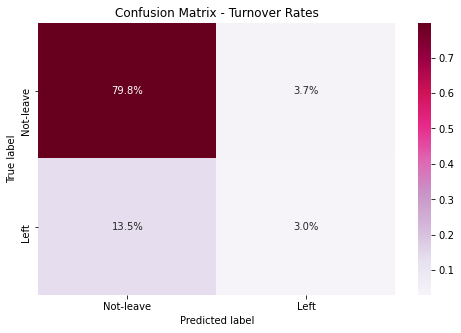

In [203]:
###Heatmap with percentage
plt.figure(figsize=(8,5))
heatmap=sns.heatmap(confusion_matrix/np.sum(confusion_matrix),annot=True, 
            fmt= '.1%', cmap= 'PuRd',
            xticklabels = ['Not-leave', 'Left'], 
            yticklabels = ['Not-leave', 'Left'])
plt.xlabel("Predicted label") 
plt.ylabel("True label")
plt.title("Confusion Matrix - Turnover Rates");

**ROC**

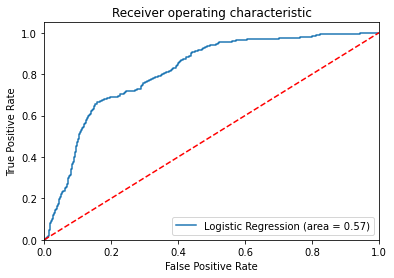

In [204]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**GINI Statistics**

In [205]:
Gini   = 2*logit_roc_auc - 1
print(" The Gini of the Model is : ", Gini)

 The Gini of the Model is :  0.1399230492429484


**NEW MODEL**

**The results are very weak. It could be that some of the variables are not contributing to the model.**

**Let's drop some of these variables and re-run the model**

In [206]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary_high', 'salary_low', 'salary_medium',
       'department_accounting', 'department_hr', 'department_marketing',
       'department_sales', 'department_strategic_management',
       'department_support_staff'],
      dtype='object')

In [264]:
y = df['left']
X = df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 
       'promotion_last_5years', 'salary_low',
       'department_accounting', 'department_hr', 'department_support_staff']]

In [265]:
#split dataset in features and target variable
# To avoid writing them out every time, we save the names of the estimators of our model in a list. 
estimators=['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 
       'promotion_last_5years', 'salary_low']
X = df[estimators]
y = df['left']

In [266]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8,random_state=0)
print('Number of sample in training data:', len(x_train))
print('Number of sample in test data:', len(x_test))

Number of sample in training data: 9592
Number of sample in test data: 2399


In [267]:
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Accuracy on Train Data**

In [268]:
training_accuracy=logreg.score(X_train,y_train)
print('Training Accuracy:',training_accuracy)

Training Accuracy: 0.8348623853211009


**Accuracy on Test Data**

In [269]:
test_accuracy=logreg.score(X_test,y_test)
print('Accuracy of the model on unseen data:', test_accuracy)

Accuracy of the model on unseen data: 0.8260189721672052


In [270]:
coeff_df = pd.DataFrame(x_train.columns)
coeff_df.columns = ['estimators']
coeff_df["Coefficient"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Coefficient', ascending=False)


,estimators,Coefficient
7,promotion_last_5years,0.623506
1,satisfaction_level,0.384227
4,average_montly_hours,0.264220
3,number_project,0.002673
2,last_evaluation,-0.268732
6,Work_accident,-0.980754
5,time_spend_company,-1.480352
0,const,-4.001677
8,salary_low,NaN
9,salary_medium,NaN


In [271]:
#Predict training data results with test data results 
y_pred = logreg.predict(X_test)

In [272]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.96      0.90      8007
           1       0.43      0.16      0.23      1586

    accuracy                           0.83      9593
   macro avg       0.64      0.56      0.56      9593
weighted avg       0.78      0.83      0.79      9593



In [273]:
import sklearn.metrics as metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8260189721672052
Precision: 0.42782608695652175
Recall: 0.15510718789407313


In [274]:
##Calculate the accuracy
logreg.score(X_test, y_test)

0.8260189721672052

In [275]:
###Evaluate the model using confusion matrix from scikit learn confusion matrix module
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[7678,  329],
       [1340,  246]], dtype=int64)

In [276]:
print('Classification Error:',1 - metrics.accuracy_score(y_test, y_pred))

Classification Error: 0.1739810278327948


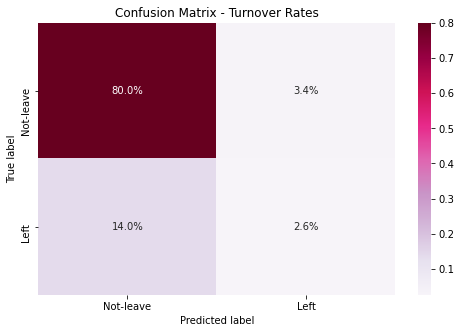

In [277]:
plt.figure(figsize=(8,5))
heatmap=sns.heatmap(confusion_matrix/np.sum(confusion_matrix),annot=True, 
            fmt= '.1%', cmap= 'PuRd',
            xticklabels = ['Not-leave', 'Left'], 
            yticklabels = ['Not-leave', 'Left'])
plt.xlabel("Predicted label") 
plt.ylabel("True label")
plt.title("Confusion Matrix - Turnover Rates");

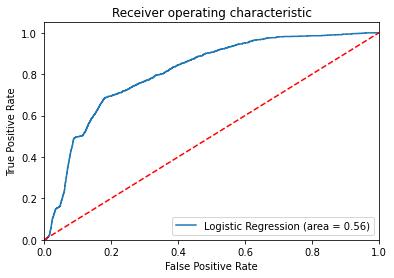

In [278]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [279]:
Gini   = 2*logit_roc_auc - 1
print(" The Gini of the Model is : ", Gini)

 The Gini of the Model is :  0.1140181408102714


In [280]:
#machine learning techniques
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

**Summary of Models**

**Logistic Regression**

In [290]:
#Log reg
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


83.49

**k-Nearest Neighbors**

In [283]:
#KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

96.16

**Support vector classification**

In [285]:
#SVM
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

83.11

**Naive Bayes algorithm**

In [286]:
#NB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

83.36

**Decision tree algorithm**

In [291]:
#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

100.0

In [296]:
conda install -c conda-forge python-graphviz

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\User\anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.4                |   py38h32f6830_2         3.1 MB  conda-forge
    openssl-1.1.1g             |       he774522_0         5.7 MB  conda-forge
    python-graphviz-0.14.1     |     pyh9f0ad1d_0          19 KB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         8.9 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.8-1_cp38

The following packages will be UPDATED:

  conda                       pkgs/

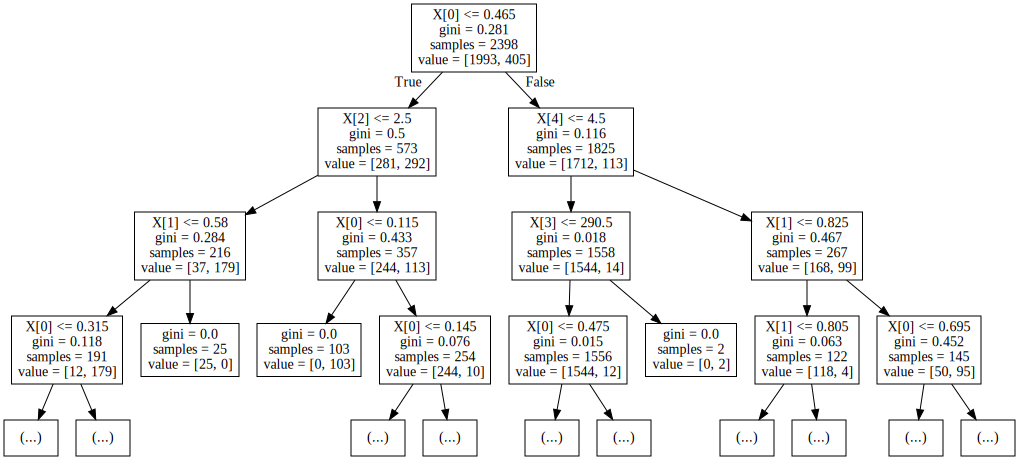

In [295]:
from sklearn import tree
import graphviz
dot_data=tree.export_graphviz(decision_tree,out_file=None, max_depth=3)
graph=graphviz.Source(dot_data)
graph

**Model Evaluation**

Note, from the Table below, the decision tree algorithm score the highest predicting that 100% of the test set employees to leave. 

In [297]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Naive Bayes', 'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_gaussian,acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,100.00
1,KNN,96.16
2,Logistic Regression,83.49
3,Naive Bayes,83.36
0,Support Vector Machines,83.11
